# Evaluation measures and logistic regression

## Task 1: Evaluation measures (2 points)

This task is built around the banknote authentication dataset. These data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes. Original dataset has 5 features but we have decided to keep only 2, in order to make the classification task harder. There are two classes in this task: forged (1) and genuine (0). See more details about the data at https://archive.ics.uci.edu/ml/datasets/banknote+authentication .

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, \
                            f1_score, roc_curve, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from IPython.display import display
%matplotlib inline
np.random.seed(0)
CRED = '\033[91m'
CEND = '\033[0m'

In [ ]:
df = pd.read_csv('data_banknote_authentication.txt', header = None, names=['variance','skewness','curtosis','entropy','y'])
df = df.drop(columns=['skewness','variance']) # We'll remove these two columns to make the task harder
pd.set_option('display.max_rows', 10)
display(df)

,curtosis,entropy,y
0,-2.8073,-0.44699,0
1,-2.4586,-1.46210,0
2,1.9242,0.10645,0
3,-4.0112,-3.59440,0
4,4.5718,-0.98880,0
...,...,...,...
1367,-1.4501,-0.55949,1
1368,6.4774,0.34179,1
1369,17.5932,-2.77710,1
1370,12.3930,-1.28230,1


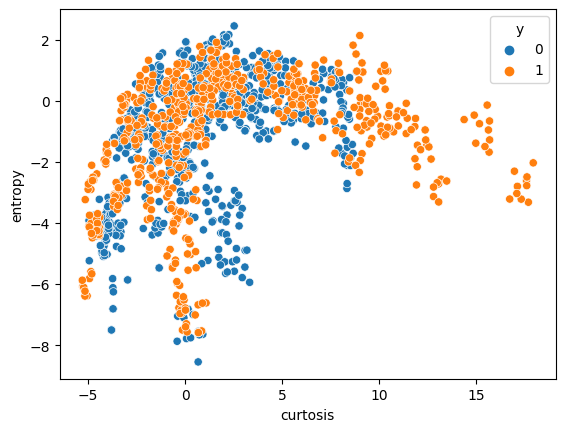

In [ ]:
sns.scatterplot(x='curtosis',y='entropy',hue='y',data=df)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('y', axis=1), df.y,
                                                    train_size=0.7, test_size=0.3,
                                                    random_state=0, shuffle=True, stratify=df.y)
X_train.shape, X_test.shape

((960, 2), (412, 2))

Now we will train and evaluate several classifiers. We will tune them as well in order to find optimal parameters and achieve  the best possible performance.

Every `sklearn` classifier has a set of tuneable parameters, you can check the list of defaults parameters like that:

In [ ]:
knn = KNeighborsClassifier()
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

For the parameter tuning you can use Grid Search (check every possible combination of parameters from the predefined dictionary). Let us see what parameter values it found as best:

In [ ]:
knn_param_grid = {
    'weights':['uniform', 'distance'],
    'n_neighbors': [1, 3, 5, 10, 15, 20, 30, 100]
}

knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=3, return_train_score=True)
knn_grid_search.fit(X_train, y_train)
knn_grid_search.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

- **(a)** On the test set calculate the accuracy of the KNN model with default parameters and with the parameters selected by cross-validation. Which is better and why?

In [ ]:
knn_default = KNeighborsClassifier()
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")

    knn_default.fit(X_train,y_train)

    ...
    knn_default_test_accuracy = knn_default.score(X_test, y_test)
    knn_tuned_test_accuracy = knn_grid_search.score(X_test, y_test)

    print('KNN test accuracy with default parameters:',knn_default_test_accuracy)
    print('KNN test accuracy after parameter tuning :',knn_tuned_test_accuracy)

    ##### YOUR CODE ENDS ##### (please do not delete this line)

except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

KNN test accuracy with default parameters: 0.7257281553398058
KNN test accuracy after parameter tuning : 0.6820388349514563


**<font color='purple'>Answer to (a):</font>**
the default parameters is better because the one's selected by cross validation overfits on the training data

- **(b)** Look at the detailed results of cross-validation as printed below. The columns ending with '_time' are about running time, but please describe the meaning of other columns.

In [ ]:
knn_cv_results = pd.DataFrame(knn_grid_search.cv_results_)
knn_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.013281,0.007210,0.075567,0.027784,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.706250,0.728125,0.70000,0.711458,0.012058,1,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.006308,0.001903,0.007802,0.003080,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.706250,0.728125,0.70000,0.711458,0.012058,1,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.007835,0.003153,0.074495,0.014353,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.706250,0.693750,0.70000,0.700000,0.005103,8,0.865625,0.853125,0.860938,0.859896,0.005156
3,0.008272,0.003810,0.012466,0.007082,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.671875,0.696875,0.70625,0.691667,0.014509,10,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.012051,0.005140,0.102459,0.020852,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.687500,0.659375,0.68750,0.678125,0.013258,13,0.812500,0.793750,0.809375,0.805208,0.008202


**<font color='purple'>Answer to (b):</font>** param_n neighbors and param_weights reperesent the value used for that parameter in each fold and params are just them combined so it can be printed, then the next 3 splits that was made in the data with their scores and the rank score ranks them based on the mean of the test score

<font color='purple'>Note that the column names involving the word 'test' might be a bit confusing - they are referring to the test fold within cross-validation, which perhaps could be better called a validation fold. Therefore, the accuracies in this table are also potentially different from what you found in subtask (b).</font>

Let us now keep only some of the columns which are the most relevant for our purpose. Also, let us sort the results by mean_test_score.

In [ ]:
def cv_column_filter(df):
    return(df.loc[:,[c for c in df.columns
                     if (c[:11]=='mean_train_') or
                        (c[:10]=='mean_test_') or
                        (c[:6]=='param_')]])

knn_cv_results = cv_column_filter(knn_cv_results)
knn_cv_results = knn_cv_results.sort_values('mean_test_score',ascending=False)
pd.set_option('display.max_rows', 20)
knn_cv_results

,param_n_neighbors,param_weights,mean_test_score,mean_train_score
0,1,uniform,0.711458,1.000000
1,1,distance,0.711458,1.000000
11,20,distance,0.708333,1.000000
7,10,distance,0.707292,1.000000
9,15,distance,0.704167,1.000000
13,30,distance,0.703125,1.000000
15,100,distance,0.703125,1.000000
2,3,uniform,0.700000,0.859896
5,5,distance,0.694792,1.000000
3,3,distance,0.691667,1.000000


- **(c)** Looking at the above table, are both parameters important factors for the performance of KNN? Generally, is more or less neighbours good in this task? Is uniform or distance-based weighting better in this task?


**<font color='purple'>Answer to (c):</font>**
both parameters are important for the performance of knn,generally less neighbours is better in this task altough distance based have some instances with larger neighbours performing better than lower ones, and distance based would be better for this task also since it mostly performs better than uniform

- **(d)** Let us now wrap up parameter tuning process into a single function, which would later work for other types of models as well, not just KNN models. Compare the displayed table to knn_cv_results above and explain the meaning of extra columns.

In [ ]:
def tune_model(model, param_grid, X_train=X_train, y_train=y_train, cv=5, max_rows=10):
    grid_search = GridSearchCV(model, param_grid, cv=cv, return_train_score=True, scoring=['accuracy','f1','roc_auc'],refit='accuracy')
    grid_search.fit(X_train, y_train)
    cv_results = pd.DataFrame(grid_search.cv_results_)
    cv_results = cv_column_filter(cv_results)
    cv_results = cv_results.sort_values('mean_test_accuracy',ascending=False)
    pd.set_option('display.max_rows',max_rows)
    display(cv_results)
    pd.reset_option('display.max_rows')
    return(grid_search)

In [ ]:
knn = KNeighborsClassifier()
knn_param_grid = {
    'weights':['uniform', 'distance'],
    'n_neighbors': [1, 3, 5, 10, 15, 20, 30, 100]
}
knn_tuned = tune_model(knn, knn_param_grid, cv=3, max_rows=20)
print(knn_tuned.best_params_)
print(knn_tuned.best_score_)

,param_n_neighbors,param_weights,mean_test_accuracy,mean_train_accuracy,mean_test_f1,mean_train_f1,mean_test_roc_auc,mean_train_roc_auc
0,1,uniform,0.711458,1.000000,0.678138,1.000000,0.708633,1.000000
1,1,distance,0.711458,1.000000,0.678138,1.000000,0.708633,1.000000
11,20,distance,0.708333,1.000000,0.646920,1.000000,0.778386,1.000000
7,10,distance,0.707292,1.000000,0.653422,1.000000,0.785184,1.000000
9,15,distance,0.704167,1.000000,0.645744,1.000000,0.779948,1.000000
13,30,distance,0.703125,1.000000,0.624956,1.000000,0.777214,1.000000
15,100,distance,0.703125,1.000000,0.583677,1.000000,0.757847,1.000000
2,3,uniform,0.700000,0.859896,0.650254,0.840392,0.744527,0.933292
5,5,distance,0.694792,1.000000,0.644024,1.000000,0.778179,1.000000
3,3,distance,0.691667,1.000000,0.645152,1.000000,0.762246,1.000000


{'n_neighbors': 1, 'weights': 'uniform'}
0.7114583333333334


**<font color='purple'>Answer to (d):</font>**

mean_test_f1 and mean_train_f1: These columns represent the mean F1-score for the test and training data, respectively. F1-score is a metric that combines precision and recall, providing insight into the model's balance between false positives and false negatives.

mean_test_roc_auc and mean_train_roc_auc: These columns represent the mean ROC AUC for the test and training data, respectively. ROC AUC is a measure of the model's ability to discriminate between positive and negative classes.

- **(e)** Are different parameter settings ranked similarly according to different evaluation measures? What are the similarities and differences between measures, according to which parameter settings they consider better or worse?

**<font color='purple'>Answer to (e):</font>**

we can observe that the rankings based on accuracy (mean_test_accuracy) and F1-score (mean_test_f1) may share some similarities, especially in terms of preferring smaller values of n_neighbors for better balance between false positives and false negatives. However, ROC AUC (mean_test_roc_auc) rankings may prioritize parameter settings differently based on their ability to separate classes effectively as larger neighbours sometimes tend to get higher results according to its measures

- **(f)** Tune the Decision Tree learner by trying out 20-100 different combinations of at least 2 parameters. Report the best hyperparameter values and the cross-validated accuracy estimate. Hint: see how the same was done above using knn_tuned object.

In [ ]:
dt = DecisionTreeClassifier()
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #   raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")

    dt_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }
    dt_tuned = tune_model(dt, dt_grid)
    best_params = dt_tuned.best_params_
    best_accuracy = dt_tuned.best_score_
    print('Best hyperparameter values:',best_params)
    print('Cross-validated accuracy estimate for these parameter values:',best_accuracy)
    ##### YOUR CODE ENDS ##### (please do not delete this line)

except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,mean_test_accuracy,mean_train_accuracy,mean_test_f1,mean_train_f1,mean_test_roc_auc,mean_train_roc_auc
38,entropy,20,1,10,0.702083,0.897135,0.652432,0.879168,0.720869,0.972477
29,entropy,10,1,10,0.702083,0.811979,0.604689,0.755616,0.741298,0.899889
11,gini,20,1,10,0.701042,0.900521,0.654392,0.885352,0.722887,0.973612
47,entropy,30,1,10,0.700000,0.902083,0.649375,0.885888,0.722295,0.975007
40,entropy,20,2,5,0.700000,0.923698,0.646578,0.910202,0.708324,0.986528
...,...,...,...,...,...,...,...,...,...,...
24,gini,30,4,2,0.672917,0.879948,0.619132,0.860091,0.721770,0.962057
17,gini,20,4,10,0.671875,0.874479,0.619520,0.855049,0.727123,0.957385
25,gini,30,4,5,0.670833,0.880208,0.616693,0.860427,0.718485,0.962208
6,gini,10,4,2,0.669792,0.821094,0.584722,0.776325,0.724656,0.914546


Best hyperparameter values: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10}
Cross-validated accuracy estimate for these parameter values: 0.7020833333333334


- **(g)** Tune the Random Forest learner by trying out 20-100 different combinations of at least 2 parameters. Report the best hyperparameter values and the cross-validated accuracy estimate. Compare columns of mean_train_accuracy and mean_test_accuracy and report which parameter values lead to more overfitting or less overfitting (or whether there is any overfitting at all).

In [ ]:
rf = RandomForestClassifier()
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")

    rf_grid = {'n_estimators': [50, 100, 200],
    'max_depth': [ 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
    }
    rf_tuned = tune_model(rf, rf_grid)
    best_params_rf = rf_tuned.best_params_
    best_accuracy_rf = rf_tuned.best_score_
    print('Best hyperparameter values:', best_params_rf)
    print('Cross-validated accuracy estimate for these parameter values:', best_accuracy_rf)


    ##### YOUR CODE ENDS ##### (please do not delete this line)

except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_test_accuracy,mean_train_accuracy,mean_test_f1,mean_train_f1,mean_test_roc_auc,mean_train_roc_auc
4,gini,10,1,5,100,0.715625,0.872656,0.627092,0.838806,0.758541,0.974502
3,gini,10,1,5,50,0.714583,0.872135,0.628707,0.839445,0.758925,0.969759
0,gini,10,1,2,50,0.710417,0.888281,0.619357,0.859515,0.758273,0.983364
15,gini,10,2,10,50,0.709375,0.844792,0.622655,0.802155,0.752316,0.948698
92,entropy,10,2,2,200,0.708333,0.846875,0.604906,0.801177,0.751908,0.962508
...,...,...,...,...,...,...,...,...,...,...,...
72,gini,30,4,2,50,0.680208,0.889323,0.611902,0.868755,0.753457,0.968683
156,entropy,30,4,5,50,0.680208,0.892708,0.609465,0.872595,0.756594,0.970892
160,entropy,30,4,10,100,0.679167,0.889583,0.615899,0.868188,0.752067,0.968501
159,entropy,30,4,10,50,0.675000,0.887500,0.604636,0.866097,0.750332,0.966263


Best hyperparameter values: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Cross-validated accuracy estimate for these parameter values: 0.715625


**<font color='purple'>Answer to (g):</font>**

There's some overfitting and it increases with increasing the max depth  & the min sample leafs lowering it should lead to a more stable model

- **(h)** Tune the SVM-RBF learner by trying out 20-100 different combinations of at least 2 parameters. Report the best hyperparameter values and the cross-validated accuracy estimate.

In [ ]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")

    svm = SVC(kernel='rbf', probability=True)
    svm_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1],
    'degree': [2, 3, 4],
    'coef0': [0, 1, 2],
    }
    svm_tuned = tune_model(svm, svm_grid)
    best_params_svm = svm_tuned.best_params_
    best_accuracy_svm = svm_tuned.best_score_
    print('Best hyperparameter values:', best_params_svm)
    print('Cross-validated accuracy estimate for these parameter values:', best_accuracy_svm)

    ##### YOUR CODE ENDS ##### (please do not delete this line)

except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

,param_C,param_coef0,param_degree,param_gamma,mean_test_accuracy,mean_train_accuracy,mean_test_f1,mean_train_f1,mean_test_roc_auc,mean_train_roc_auc
80,10,2,4,0.1,0.682292,0.709375,0.544715,0.576896,0.722524,0.758672
77,10,2,3,0.1,0.682292,0.709375,0.544715,0.576896,0.722524,0.758672
56,10,0,2,0.1,0.682292,0.709375,0.544715,0.576896,0.722524,0.758672
59,10,0,3,0.1,0.682292,0.709375,0.544715,0.576896,0.722524,0.758672
62,10,0,4,0.1,0.682292,0.709375,0.544715,0.576896,0.722524,0.758672
...,...,...,...,...,...,...,...,...,...,...
12,0.1,1,3,0.001,0.555208,0.555208,0.000000,0.000000,0.536714,0.536939
9,0.1,1,2,0.001,0.555208,0.555208,0.000000,0.000000,0.536714,0.536939
6,0.1,0,4,0.001,0.555208,0.555208,0.000000,0.000000,0.536714,0.536939
3,0.1,0,3,0.001,0.555208,0.555208,0.000000,0.000000,0.536714,0.536939


Best hyperparameter values: {'C': 10, 'coef0': 0, 'degree': 2, 'gamma': 0.1}
Cross-validated accuracy estimate for these parameter values: 0.6822916666666667


- **(i)** All the above models can produce class probabities. For example, with the decision tree the probabilities for the first 5 training instances are as follows. What would the predicted classes on these 5 instances be, if we thresholded the model at probability 0.5?

In [ ]:
pd.DataFrame(rf_tuned.predict_proba(X_train)[:5,:],columns=rf_tuned.classes_)

,0,1
0,0.360564,0.639436
1,0.252240,0.747760
2,0.601926,0.398074
3,0.085982,0.914018
4,0.737399,0.262601


**<font color='purple'>Answer to (i):</font>**
1,1,0,1,0

- **(j)** Next we define a new class ThresholdedModel which can be constructed from any classifier which can produce class probabilities using predict_proba function. Construct a ThresholdedModel on rf_tuned with threshold 0.5. Report what the predicted classes are for the first 5 training instances. Also report the overall accuracy and F1-measure on the training set.

In [ ]:
class ThresholdedModel:
    def __init__(self,model,threshold):
        self.model = model
        self.threshold = threshold
    def __str__(self):
        return('%s thresholded at %f' % (str(self.model.estimator).split('(')[0], self.threshold))
    def predict(self,X):
        return(np.array(self.model.predict_proba(X)[:,1] >= self.threshold, dtype=int))

In [ ]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")

    rf_thr05 = ThresholdedModel(rf_tuned, threshold=0.5)
    rf_thr05_predictions = rf_thr05.predict(X_train[:5])
    print('Predicted classes of first 5 instances are:',rf_thr05_predictions)
    print('Training set accuracy:',accuracy_score(y_train, rf_thr05.predict(X_train)))
    print('Training set F-measure:',f1_score(y_train, rf_thr05.predict(X_train)))

except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

Predicted classes of first 5 instances are: [1 1 0 1 0]
Training set accuracy: 0.8572916666666667
Training set F-measure: 0.8165997322623828


- **(k)** Next we define a function to consider all possible thresholds and find the one which maximizes the F-measure on the training data. Please explain what each of the 4 rows is doing in the function.

In [ ]:
def optimize_threshold(model, measure_func, X, y):
    predictions = model.predict_proba(X)[:,1]    ### ROW 1
    thresholds = sorted(np.unique(list(predictions)+[np.inf]))     ### ROW 2
    scores = [measure_func(y,np.array(predictions>=t, dtype=int)) for t in thresholds]    ### ROW 3
    return(ThresholdedModel(model,thresholds[np.argmax(scores)]))   ### ROW 4

dt_opt_f1 = optimize_threshold(dt_tuned,f1_score,X_train,y_train)
dt_opt_acc = optimize_threshold(dt_tuned,accuracy_score,X_train,y_train)
rf_opt_f1 = optimize_threshold(rf_tuned,f1_score,X_train,y_train)
rf_opt_acc = optimize_threshold(rf_tuned,accuracy_score,X_train,y_train)
svm_opt_f1 = optimize_threshold(svm_tuned,f1_score,X_train,y_train)
svm_opt_acc = optimize_threshold(svm_tuned,accuracy_score,X_train,y_train)
print(dt_opt_f1)
print(dt_opt_acc)
print(rf_opt_f1)
print(rf_opt_acc)
print(svm_opt_f1)
print(svm_opt_acc)

DecisionTreeClassifier thresholded at 0.500000
DecisionTreeClassifier thresholded at 0.500000
RandomForestClassifier thresholded at 0.400484
RandomForestClassifier thresholded at 0.405688
SVC thresholded at 0.317354
SVC thresholded at 0.585247


**<font color='purple'>Answer to (k):</font>**

row 1 :  calculates the predicted probabilities of the postive class "class 1"

row 2 :  creates a sorted list of unique threshold values. It combines the predicted probabilities with positive infinity (np.inf) to cover all the range

row 3 :  calculates the measure (F-measure or accuracy) for each threshold value in the list, it iterates over the values and it calculates each predicted class based on the probability if it's greater or equal then using whatever measure func used it compares the predictions with the true labels

row 4 : this returns the model with the threshold that's best for the measure func that was passed


- **(l)** Run the code below to evaluate the constructed models with several measures. Judging by accuracy, which of the models are less affected by overfitting, which more affected?

In [ ]:
from sklearn.metrics import SCORERS, make_scorer

def evaluate_models(models,measures,X,y):
    return(pd.concat( [pd.DataFrame({'model':[str(model) for model in models]}),
        pd.DataFrame({measure:[SCORERS[measure](model,X,y) for model in models] for measure in measures}) ],axis=1))

models = [dt_tuned,dt_opt_acc,dt_opt_f1,
          rf_tuned,rf_opt_acc,rf_opt_f1,
          svm_tuned,svm_opt_acc,svm_opt_f1]
measures = ['accuracy','precision','recall','f1']
display(evaluate_models(models,measures,X_train,y_train))
display(evaluate_models(models,measures,X_test,y_test))

,model,accuracy,precision,recall,f1
0,"GridSearchCV(cv=5, estimator=DecisionTreeClass...",0.898958,0.896635,0.873536,0.884935
1,DecisionTreeClassifier thresholded at 0.500000,0.898958,0.863436,0.918033,0.889898
2,DecisionTreeClassifier thresholded at 0.500000,0.898958,0.863436,0.918033,0.889898
3,"GridSearchCV(cv=5, estimator=RandomForestClass...",0.857292,0.953125,0.714286,0.816600
4,RandomForestClassifier thresholded at 0.405688,0.886458,0.842672,0.915691,0.877666
5,RandomForestClassifier thresholded at 0.400484,0.885417,0.832285,0.929742,0.878319
6,"GridSearchCV(cv=5, estimator=SVC(probability=T...",0.712500,0.875622,0.412178,0.560510
7,SVC thresholded at 0.585247,0.714583,0.884422,0.412178,0.562300
8,SVC thresholded at 0.317354,0.632292,0.558917,0.822014,0.665403


,model,accuracy,precision,recall,f1
0,"GridSearchCV(cv=5, estimator=DecisionTreeClass...",0.679612,0.639344,0.639344,0.639344
1,DecisionTreeClassifier thresholded at 0.500000,0.696602,0.647959,0.693989,0.670185
2,DecisionTreeClassifier thresholded at 0.500000,0.696602,0.647959,0.693989,0.670185
3,"GridSearchCV(cv=5, estimator=RandomForestClass...",0.730583,0.736842,0.612022,0.668657
4,RandomForestClassifier thresholded at 0.405688,0.711165,0.650943,0.754098,0.698734
5,RandomForestClassifier thresholded at 0.400484,0.708738,0.645161,0.765027,0.700000
6,"GridSearchCV(cv=5, estimator=SVC(probability=T...",0.694175,0.771429,0.442623,0.562500
7,SVC thresholded at 0.585247,0.684466,0.773196,0.409836,0.535714
8,SVC thresholded at 0.317354,0.616505,0.542662,0.868852,0.668067


**<font color='purple'>Answer to (l):</font>**

SVM is surely less affected by overfitting and the tuned decision tree is the most affected by overfitting

- **(m)** From the above tables compare the F-measure performance of the cross-validated model using default threshold (*_tuned) with the threshold specifically optimised for F-measure. Was there any benefit from threshold optimisation?

**<font color='purple'>Answer to (m):</font>**

there was definetely a benefit in the threshold optimisation for the f1 score in all models it proved to improve the f1 :

- **(n)** From the above tables compare the accuracy performance of the cross-validated model using default threshold (*_tuned) with the threshold specifically optimised for accuracy. Was there any benefit from threshold optimisation?

**<font color='purple'>Answer to (n):</font>**

it had a small beenefit compared to the f1 optimisation except in the dt case it was the same

and it proved the opposite concerning the svm model

- **(o)** Compare the confusion matrices on the test data for two of the models from subtask (l). Choose one which has high F-measure and one which has high accuracy. What are the key differences between these confusion matrices?

In [ ]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
#    raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")

    print(confusion_matrix(y_test, rf_opt_f1.predict(X_test)))
    print(confusion_matrix(y_test, rf_tuned.predict(X_test)))
    ##### YOUR CODE ENDS ##### (please do not delete this line)

except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

[[152  77]
 [ 43 140]]
[[189  40]
 [ 71 112]]


**<font color='purple'>Answer to (o):</font>**

rf_opt_f1 has a higher F1 score and precision compared to rf_tuned. This means that rf_opt_f1 achieves a better balance between precision and recall, making it suitable for tasks where false positives are as important as false negatives.

rf_tuned has a slightly higher overall accuracy than rf_opt_f1. This makes it suitable for tasks where maximizing the number of correct predictions is a top priority.

rf_opt_f1 has a lower recall compared to rf_tuned. This means that rf_tuned captures more positive cases, which can be important for applications where identifying all positive instances is critical.

rf_opt_f1 prioritizes precision and F1 score, achieving a better balance between false positives and false negatives. On the other hand, rf_tuned emphasizes higher overall accuracy and recall


- **(p)** Finally, draw the ROC curves for the scoring classifiers and add the thresholded models to the plot using our given code, on the training data. Is some model dominating over any other (higher everywhere)? What are the main differences between the ROC curves on train and test data?

In [ ]:
def roc_plot(models, thresholded_models, X, y):
    fig = plt.figure(figsize=(8,8))
    for model in models:
        probs = model.predict_proba(X)[:,1]
        auc = roc_auc_score(y, probs)
        fpr,tpr,thr = roc_curve(y,probs)
        plt.plot(fpr, tpr, label='{} (AUC={:.2f})'.format(str(model.estimator).split('(')[0], auc))
    for t_model in thresholded_models:
        y_pred = t_model.predict(X)
        tpr = np.sum(np.logical_and(y_pred, y == 1)) / np.sum(y == 1)
        fpr = np.sum(np.logical_and(y_pred, y == 0)) / np.sum(y == 0)
        plt.plot(fpr, tpr, 'x', label='{}'.format(str(t_model)))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    plt.show()

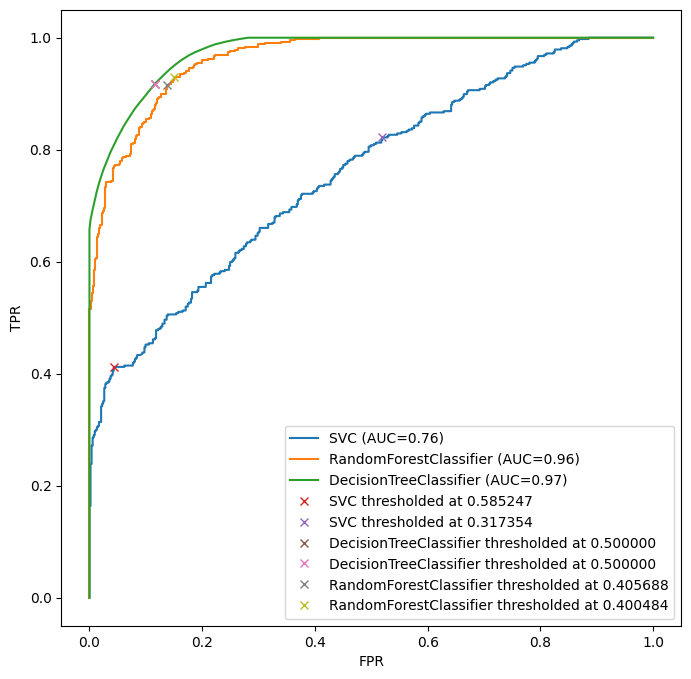

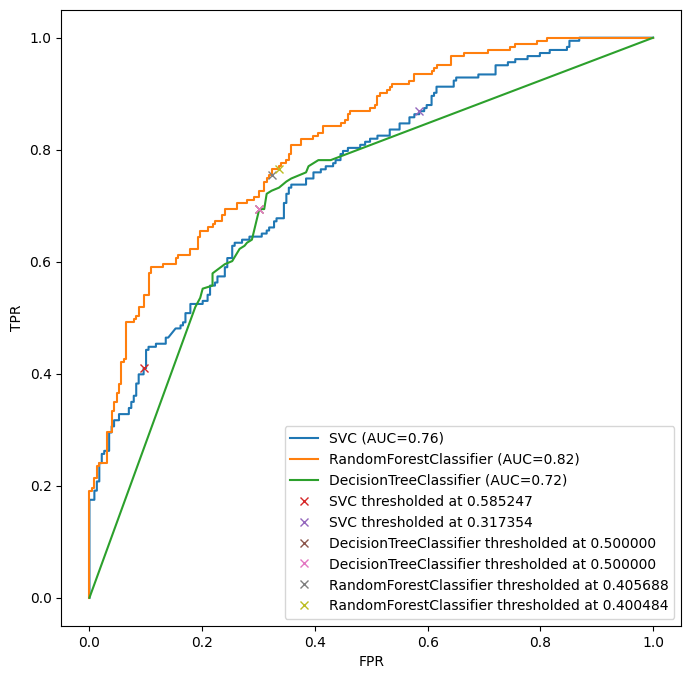

In [ ]:
roc_plot([svm_tuned,rf_tuned,dt_tuned],[svm_opt_acc,svm_opt_f1,dt_opt_acc,dt_opt_f1,rf_opt_acc,rf_opt_f1],X_train,y_train)
roc_plot([svm_tuned,rf_tuned,dt_tuned],[svm_opt_acc,svm_opt_f1,dt_opt_acc,dt_opt_f1,rf_opt_acc,rf_opt_f1],X_test,y_test)

**<font color='purple'>Answer to (p):</font>**

The random forest model dominates over the svm but there's no model that generally dominates over all the others , the area under the roc curves in the training data is much larger and on the test it's lower that indicates overfitting since area under the curves differs alot between the train and test , also the smoother roc curve on the training data than the test data roc curve indicates that it's not generalized and doesn't handle noise well

## Task 2: Logistic regression (4 points)

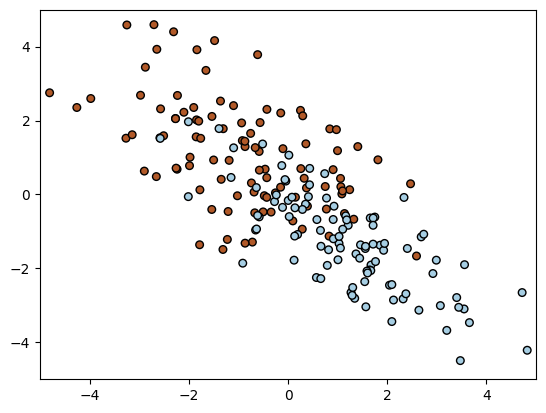

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def create_synthetic_data(n_instances):
    n_positives = round(n_instances/2)
    n_negatives = n_instances - n_positives
    X = np.zeros((n_instances,2))
    X[:n_positives,:] = np.random.multivariate_normal((-1,+1),((2,-1),(-1,2)),n_positives)
    X[n_positives:,:] = np.random.multivariate_normal((+1,-1),((2,-1.5),(-1.5,2)),n_negatives)
    Y = n_positives*[1]+n_negatives*[0]
    return(X,Y)

np.random.seed(0)
train_X, train_Y = create_synthetic_data(200)
test_X, test_Y = create_synthetic_data(20000)

plt.scatter(train_X[:, 0], train_X[:, 1], s=30, c=train_Y, cmap=plt.cm.Paired, edgecolors='k')
plt.axis([-5, 5, -5, 5])
plt.show()

- **(a)** Implement logistic regression using gradient descent of cross entropy. For this look up the formula for cross entropy and its gradient formulas from the lecture slides. Print out the final weights and bias term. Print out the number of iterations that the algorithm ran.  

**<font color='purple'>(a) Your implementation, prints out the final weights and bias term and the number of iterations:</font>**

In [ ]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")

      # Convert data to numpy arrays
      train_X = np.array(train_X)
      train_Y = np.array(train_Y)
      test_X = np.array(test_X)
      test_Y = np.array(test_Y)


      def model(x_train,y_train,x_test,y_test,lr,threshold):
          # Initialize weights and bias
          w = np.zeros(train_X.shape[1])
          b = 0

          # Set hyperparameters
          learning_rate = lr #0.01
          convergence_threshold = threshold #1e-6
          previous_loss = float('inf')

          # Lists to store losses for training and test data
          train_losses = []
          test_losses = []

          # Sigmoid function
          def sigmoid(z):
              return 1 / (1 + np.exp(-z))

          # Gradient descent
          iteration_count = 0
          while True:
              # Calculate predictions for training data
              train_predictions = sigmoid(np.dot(train_X, w) + b)
              # Calculate cross-entropy loss for training data
              train_loss = -np.mean(train_Y * np.log(train_predictions) + (1 - train_Y) * np.log(1 - train_predictions))
              train_losses.append(train_loss)

              # Calculate predictions for test data
              test_predictions = sigmoid(np.dot(test_X, w) + b)
              # Calculate cross-entropy loss for test data
              test_loss = -np.mean(test_Y * np.log(test_predictions) + (1 - test_Y) * np.log(1 - test_predictions))
              test_losses.append(test_loss)

              # Check for convergence
              if abs(previous_loss - train_loss) < convergence_threshold:
                  break

              # Calculate gradients
              dw = np.dot(train_X.T, (train_predictions - train_Y)) / len(train_Y)
              db = np.sum(train_predictions - train_Y) / len(train_Y)

              # Update weights and bias
              w -= learning_rate * dw
              b -= learning_rate * db

              # Increment iteration counter
              iteration_count += 1

              # Print the loss every 100 iterations
              if iteration_count % 100 == 0:
                  print(f'Iteration {iteration_count}, Training Loss: {train_loss}, Test Loss: {test_loss}')

              # Update previous loss for convergence check
              previous_loss = train_loss
              # Print final weights, bias, and number of iterations
          print('Final Weights:', w)
          print('Final Bias:', b)
          print('Number of Iterations:', iteration_count)
          return w,b,train_losses,test_losses,iteration_count
      final_weights,final_bias,train_loss,test_loss,iterations= model(train_X,train_Y,test_X,test_Y,0.01,1e-10)
        ##### YOUR CODE ENDS ##### (please do not delete this line)

except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)


Iteration 100, Training Loss: 0.47198592936036193, Test Loss: 0.49634554066152975
Iteration 200, Training Loss: 0.4334276913640484, Test Loss: 0.4665118562481737
Iteration 300, Training Loss: 0.4200254899748826, Test Loss: 0.45864777629397324
Iteration 400, Training Loss: 0.4138366295962308, Test Loss: 0.45653392726440634
Iteration 500, Training Loss: 0.4104947507943297, Test Loss: 0.45638291108508294
Iteration 600, Training Loss: 0.40849372945782564, Test Loss: 0.4569687482584344
Iteration 700, Training Loss: 0.407202483051661, Test Loss: 0.4578224898806784
Iteration 800, Training Loss: 0.4063207823284266, Test Loss: 0.4587480915073952
Iteration 900, Training Loss: 0.40569203060593595, Test Loss: 0.45966061972914557
Iteration 1000, Training Loss: 0.4052284416711504, Test Loss: 0.4605239829241422
Iteration 1100, Training Loss: 0.4048777689733103, Test Loss: 0.46132455333802574
Iteration 1200, Training Loss: 0.40460727355779086, Test Loss: 0.46205922758528606
Iteration 1300, Training Lo

- **(b)** Supplement each iteration of your above implementation with the calculation of cross entropy on the training data and on the test data. Make a plot with iteration number on the x-axis and cross entropy on the y-axis, with training and test loss shown in different colour. Discuss if you see signs of overfitting.

**<font color='purple'>(b) Your implementation making the plot:</font>**

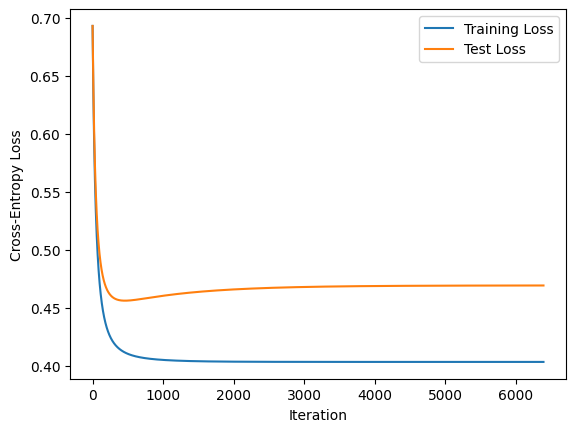

In [ ]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
#    raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
# Plotting
    iterations = range(1, iterations + 2)
    plt.plot(iterations, train_loss, label='Training Loss')
    plt.plot(iterations, test_loss, label='Test Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Cross-Entropy Loss')
    plt.legend()
    plt.show()


    ##### YOUR CODE ENDS ##### (please do not delete this line)

except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

**<font color='purple'>Discuss if you see signs of overfitting:</font>**

There's no overfitting

Although there seems to be a small gap between the losses as the iterations increase both losses are in continous decrease which indicates that the model does not overfit and in this case it generalizes well to unseen data that explains the gap between the two loss curves

- **(c)** Compare your learned weights and bias term to those obtained from sklearn implementation of logistic regression (sklearn.linear_model.LogisticRegression). Please use the parameter C value `C=1e10` (this is needed as by default sklearn logistic regression uses regularisation). Print out the final weights and bias term. Print out the differences from what your implementation found (subtract sklearn weights and bias from your weights and bias, respectively, and print out). The coefficients from sklearn implementation and your implementation must not differ by more than 0.001 (if they do then please check your code and possibly run more iterations or adjust the learning rate).

**<font color='purple'>(c) Your code to print the model learned with sklearn implementation of logistic regression and its difference from yours:</font>**

In [ ]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    from sklearn.linear_model import LogisticRegression

    # Run scikit-learn logistic regression
    sklearn_model = LogisticRegression(C=1e10)
    sklearn_model.fit(train_X, train_Y)

    # Get weights and bias from scikit-learn model
    sklearn_final_weights = sklearn_model.coef_[0]
    sklearn_final_bias = sklearn_model.intercept_[0]

    # Print out the results
    print('Your Implementation - Final Weights:', final_weights)
    print('Scikit-learn Implementation - Final Weights:', sklearn_final_weights)
    print('Difference in Weights:', final_weights - sklearn_final_weights)

    print('\nYour Implementation - Final Bias:', final_bias)
    print('Scikit-learn Implementation - Final Bias:', sklearn_final_bias)
    print('Difference in Bias:', final_bias - sklearn_final_bias)

    # Check if the coefficients differ by more than 0.001
    if np.max(np.abs(final_weights - sklearn_final_weights)) > 0.001 or \
      np.abs(final_bias - sklearn_final_bias) > 0.001:
        print("\nWarning: Coefficients differ by more than 0.001")
    else:
        print("\nCoefficients are within the acceptable difference.")
    ##### YOUR CODE ENDS ##### (please do not delete this line)

except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

Your Implementation - Final Weights: [-0.44213372  1.03225866]
Scikit-learn Implementation - Final Weights: [-0.44153345  1.0331171 ]
Difference in Weights: [-0.00060027 -0.00085844]

Your Implementation - Final Bias: 0.17486930815345
Scikit-learn Implementation - Final Bias: 0.17508722573296565
Difference in Bias: -0.00021791757951564183

Coefficients are within the acceptable difference.


- **(d)** Implement logistic regression using **stochastic** gradient descent of cross entropy. Print out the final weights and bias term. Print out the differences in weights and bias between this implementation and sklearn logistic regression (sklearn.linear_model.LogisticRegression, same as in subtask (c)). The coefficients from sklearn implementation and your implementation must not differ by more than 0.001 (if they do then please check your code and possibly run more iterations or adjust the learning rate).

**<font color='purple'>(d) Your implementation, prints out the final weights and bias term and the number of iterations, prints out the differences between your implementation and sklearn:</font>**

In [ ]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")




    def stochastic_logistic_regression(x_train, y_train, x_test, y_test, lr, threshold):
        def sigmoid(z):
          return 1 / (1 + np.exp(-z))


        np.random.seed(42)

        w = np.zeros(x_train.shape[1])
        b = np.random.randn()


        learning_rate = lr
        convergence_threshold = threshold
        previous_loss = float('inf')

        train_losses = []
        test_losses = []

        iteration_count = 0

        while True:
            random_index = np.random.randint(len(x_train))
            x_i = x_train[random_index]
            y_i = y_train[random_index]

            prediction = sigmoid(np.dot(x_i, w) + b)
            loss = -y_i * np.log(prediction) - (1 - y_i) * np.log(1 - prediction)

            w -= learning_rate * x_i * (prediction - y_i)
            b -= learning_rate * (prediction - y_i)

            iteration_count += 1

            avg_train_loss = np.mean([-y_i * np.log(sigmoid(np.dot(x_i, w) + b)) - (1 - y_i) * np.log(1 - sigmoid(np.dot(x_i, w) + b)) for x_i, y_i in zip(x_train, y_train)])
            train_losses.append(avg_train_loss)

            avg_test_loss = np.mean([-y_i * np.log(sigmoid(np.dot(x_i, w) + b)) - (1 - y_i) * np.log(1 - sigmoid(np.dot(x_i, w) + b)) for x_i, y_i in zip(x_test, y_test)])
            test_losses.append(avg_test_loss)

            if iteration_count % 100 == 0:
                print(f'Weight {w}')
                print(f'Bias {b}')
                print(f'Iteration {iteration_count}, Training Loss: {avg_train_loss}, Test Loss: {avg_test_loss}')

            if abs(previous_loss - avg_train_loss) < convergence_threshold:
                break

            previous_loss = avg_train_loss
            if iteration_count == 8650:
              break

        # Print final weights, bias, and number of iterations
        print('Final Weights:', w)
        print('Final Bias:', b)
        print('Number of Iterations:', iteration_count)

        return w, b, train_losses, test_losses, iteration_count

    final_weights_stochastic,final_bias_stochastic,train_loss_stochastic,test_loss_stochastic,iterations_stochastic= stochastic_logistic_regression(train_X,train_Y,test_X,test_Y,0.1,1e-10)
        # Print out the results
    print('Your Implementation - Final Weights:', final_weights_stochastic)
    print('Scikit-learn Implementation - Final Weights:', sklearn_final_weights)
    print('Difference in Weights:', final_weights_stochastic - sklearn_final_weights)

    print('\nYour Implementation - Final Bias:', final_bias_stochastic)
    print('Scikit-learn Implementation - Final Bias:', sklearn_final_bias)
    print('Difference in Bias:', final_bias_stochastic - sklearn_final_bias)

    # Check if the coefficients differ by more than 0.001
    if np.max(np.abs(final_weights_stochastic - sklearn_final_weights)) > 0.001 or \
      np.abs(final_bias_stochastic - sklearn_final_bias) > 0.001:
        print("\nWarning: Coefficients differ by more than 0.001")
    else:
        print("\nCoefficients are within the acceptable difference.")
    ##### YOUR CODE ENDS ##### (please do not delete this line)

except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

Weight [-0.69684801  0.99237742]
Bias 0.4490025766979236
Iteration 100, Training Loss: 0.4120158260097863, Test Loss: 0.4827882000880648
Weight [-0.61909119  0.97330785]
Bias 0.25858624529376956
Iteration 200, Training Loss: 0.4061111765095787, Test Loss: 0.47056539816545956
Weight [-0.31739565  0.87532398]
Bias -0.30387095701234257
Iteration 300, Training Loss: 0.42284237170689565, Test Loss: 0.4703823652743567
Weight [-0.69267091  0.69117622]
Bias 0.0008743761091712376
Iteration 400, Training Loss: 0.4142957572003214, Test Loss: 0.4556325714276726
Weight [-0.66628554  0.92543174]
Bias 0.15027185943708105
Iteration 500, Training Loss: 0.40730498437600926, Test Loss: 0.4660613006344327
Weight [-0.68039734  1.15919138]
Bias 0.26765927942610335
Iteration 600, Training Loss: 0.41070355254773283, Test Loss: 0.48633346832328006
Weight [-0.50391451  1.14625538]
Bias -0.057899440043515174
Iteration 700, Training Loss: 0.4091533824834005, Test Loss: 0.47525741863610993
Weight [-0.38930216  1.0

- **(e)** About your stochastic gradient descent implementation make the same plot as you did in subtask **(b)** about gradient descent (cross entropy on train and test at each iteration). Discuss if you see signs of overfitting. Discuss the differences of plots about gradient descent and stochastic gradient descent.

**<font color='purple'>Your implementation making the plot:</font>**

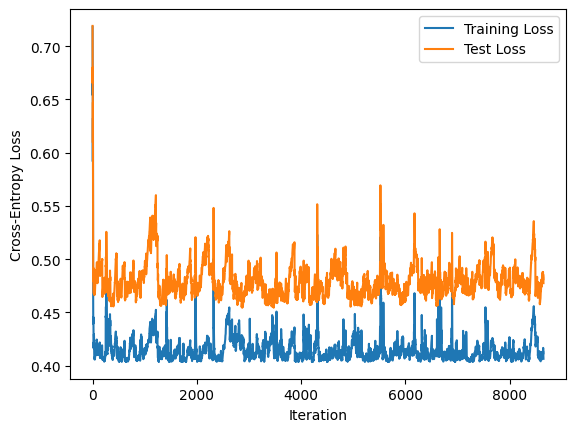

In [ ]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")

    # Plotting
    iterations_stc = range(1, iterations_stochastic + 1)
    plt.plot(iterations_stc, train_loss_stochastic, label='Training Loss')
    plt.plot(iterations_stc, test_loss_stochastic, label='Test Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Cross-Entropy Loss')
    plt.legend()
    plt.show()

    ##### YOUR CODE ENDS ##### (please do not delete this line)

except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

**<font color='purple'>Discuss if you see signs of overfitting:</font>**

There seems to be no signs of overfitting



**<font color='purple'>Discuss the differences of plots about gradient descent and stochastic gradient descent:</font>**

It has more noise and fluctations and its not as smooth as normal gradient descent

- **(f)** Calculate and report accuracy of the logistic regression model on the test data. Do this on the model learned with sklearn in subtask **(c)**.

**<font color='purple'>(f) Your implementation reporting accuracy:</font>**

In [ ]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
#raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")

    from sklearn.metrics import accuracy_score

    # Assuming you have the predictions from the sklearn model stored in sklearn_predictions
    sklearn_predictions = sklearn_model.predict(test_X)

    # Calculate accuracy
    accuracy = accuracy_score(test_Y, sklearn_predictions)

    # Report accuracy
    print(f"Accuracy on the test data: {accuracy}")

    ##### YOUR CODE ENDS ##### (please do not delete this line)

except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

Accuracy on the test data: 0.77765


- **(g)** Since we have generated the data ourselves with balanced classes drawn from two Gaussian distributions, we know what the optimal classifier is. The optimal classifier must predict positive whenever the likelihood of the positive class is higher than the likelihood of the negative class (as the class priors are equal, comparing the likelihoods is sufficient). For each test instance calculate these likelihoods and then calculate the accuracy of the optimal classifier on the test data (this classifier is known as the Bayes-optimal classifier).

**<font color='purple'>(g) Add to the following implementation and print accuracy of the Bayes-optimal classifier:</font>**

In [ ]:
from scipy.stats import multivariate_normal


try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
   # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")

    pos_likelihood_func = multivariate_normal(mean=(-1,+1), cov=((2,-1),(-1,2))).pdf
    neg_likelihood_func = multivariate_normal(mean=(+1,-1), cov=((2,-1.5),(-1.5,2))).pdf

    # Example usage:
    # print)
    # print(neg_likelihood_func(test_X))

    # Calculate the likelihoods for positive and negative classes
    pos_likelihood = pos_likelihood_func(test_X)
    neg_likelihood = neg_likelihood_func(test_X)

    # Predict the class with higher likelihood for each instance
    bayes_optimal_predictions = np.argmax(np.vstack([neg_likelihood, pos_likelihood]), axis=0)

    # Calculate accuracy of the Bayes-optimal classifier
    accuracy_bayes_optimal = accuracy_score(test_Y, bayes_optimal_predictions)

    # Report accuracy
    print(f"Accuracy of the Bayes-optimal classifier on the test data: {accuracy_bayes_optimal}")

    ##### YOUR CODE ENDS ##### (please do not delete this line)

except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

Accuracy of the Bayes-optimal classifier on the test data: 0.7926


- **(h)** Learn a SVM model with RBF kernel with default parameters and report the accuracy on the test data.

**<font color='purple'>(h) Your implementation reporting test accuracy of SVM:</font>**

In [ ]:
from sklearn import svm
svm_model = svm.SVC()

try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")

    # Learn an SVM model with RBF kernel using default parameters
    svm_model.kernel='rbf'

    svm_model.fit(train_X, train_Y)

    # Make predictions on the test data
    svm_predictions = svm_model.predict(test_X)

    # Calculate accuracy of the SVM model on the test data
    accuracy_svm = accuracy_score(test_Y, svm_predictions)
    # Report accuracy
    print(f"Accuracy of the SVM model with RBF kernel on the test data: {accuracy_svm}")

    ##### YOUR CODE ENDS ##### (please do not delete this line)

except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

Accuracy of the SVM model with RBF kernel on the test data: 0.78245


- **(i)** Draw the decision boundaries of the logistic regression model learned in **(c)**, SVM model learned in **(h)** and the Bayes-optimal model (explained in **(g)**). Discuss whether logistic regression or SVM learned a better model and explain why.

**<font color='purple'>Fill the gaps in the following code:</font>**

In [ ]:
def make_plots(lr_model,svm_model):
    x1, x2 = np.meshgrid(np.linspace(-5, 5, 500),np.linspace(-5, 5, 500))
    xx = np.c_[x1.ravel(), x2.ravel()]
    opt_pred = np.sign(pos_likelihood_func(xx)/(pos_likelihood_func(xx)+neg_likelihood_func(xx))-0.5)
    opt_pred = opt_pred.reshape(x1.shape)

    lr_pred = np.sign(lr_model.predict(xx)-0.5).reshape(x1.shape)
    svm_pred = np.sign(svm_model.predict(xx)-0.5).reshape(x1.shape)

    fig, axes = plt.subplots(1,3,figsize=(15,5))

    for i in range(3):
        pred = [lr_pred,svm_pred,opt_pred][i]
        ax = axes[i]
        ax.imshow(pred, interpolation='nearest',
                  extent=(x1.min(), x1.max(), x2.min(), x2.max()), aspect='auto',
                  origin='lower', cmap=plt.cm.PuOr_r)
        contours = ax.contour(x1, x2, pred, levels=[0], linewidths=2)
        ax.scatter(train_X[:, 0], train_X[:, 1], s=30, c=train_Y, cmap=plt.cm.Paired,
                    edgecolors='k')
        ax.axis([-5, 5, -5, 5])

    plt.show()

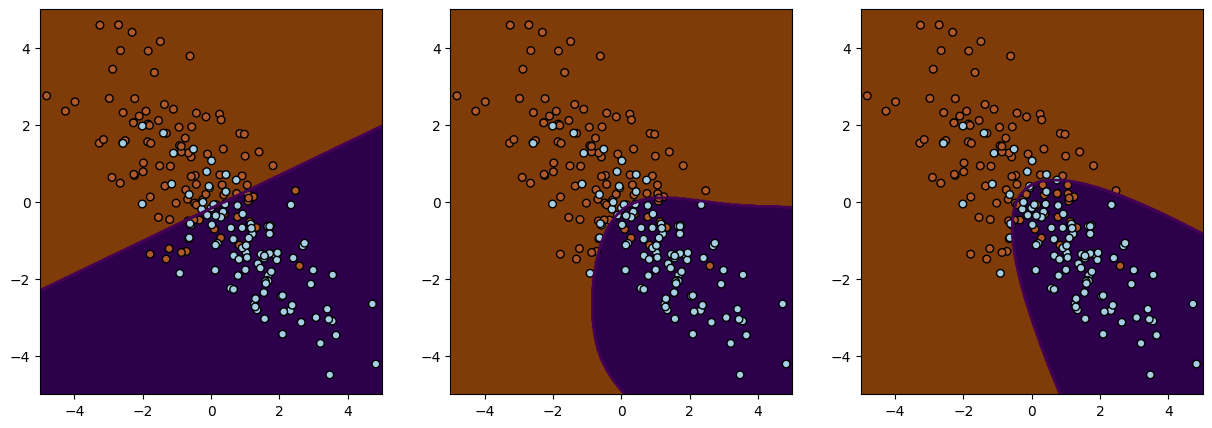

In [ ]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")

    lr_model = sklearn_model # put the logistic regression model here
    svm_model = svm_model # put the SVM model here
    make_plots(lr_model,svm_model)

    ##### YOUR CODE ENDS ##### (please do not delete this line)

except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

**<font color='purple'>Discuss whether logistic regression or SVM learned a better model and explain why:</font>**

I think logistic regression learned a better model because it seems more generalized and it seems to have better f1 score as it values both negative and positive classes unlike svm it seems that it values identifying the positive class than being more general and in the end it depends on the problem we have maybe prioritizing classifying most of the positive classes have more importance than being balanced towards both classes

- **(j)** Use the logistic regression model from subtask **(c)** to obtain class probability estimates on the test data (note that you can easily do **(c)** even if you did not solve **(a)** and **(b)**). Evaluate these probabilities with cross entropy with respect to the actual class. For this implement a function calculating cross entropy. Report the value of cross entropy.

**<font color='purple'>Fill the gaps in the following code and report cross entropy:</font>**

In [ ]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")

    lr_model = sklearn_model # put the logistic regression model here
    class_prob_estimates = lr_model.predict_proba(test_X)
    print(class_prob_estimates[:10, :])

    def cross_entropy(predicted_probabilities,actual_classes):
        # please implement this function
            epsilon = 1e-15  # small constant to avoid log(0)

        # Clip predicted probabilities to avoid log(0) or log(1)
            predicted_probabilities = np.clip(predicted_probabilities, epsilon, 1 - epsilon)

        # Calculate cross entropy
            result = -np.mean(actual_classes * np.log(predicted_probabilities[:, 1]) + (1 - actual_classes) * np.log(1 - predicted_probabilities[:, 1]))

            return result

    print(cross_entropy(class_prob_estimates,test_Y))

    ##### YOUR CODE ENDS ##### (please do not delete this line)

except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

[[0.4745888  0.5254112 ]
 [0.03979416 0.96020584]
 [0.80149511 0.19850489]
 [0.04127024 0.95872976]
 [0.27335474 0.72664526]
 [0.65204293 0.34795707]
 [0.27016351 0.72983649]
 [0.00627124 0.99372876]
 [0.08479588 0.91520412]
 [0.00597438 0.99402562]]
0.4694548920845995


- **(k)** Apply Platt scaling (also called logistic calibration) on the SVM model from **(h)**. Evaluate the resulting probabilities with cross entropy and report the result.

**<font color='purple'>Fill the gaps in the following code and report cross entropy:</font>**

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

svm_cal = CalibratedClassifierCV(svm_model, cv=2, method='sigmoid')
svm_cal.fit(train_X, train_Y)
svm_cal_prob = svm_cal.predict_proba(test_X)

try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")

    # calculate and print cross entropy on the predicted probabilities
    print(cross_entropy(svm_cal_prob,test_Y))
    ##### YOUR CODE ENDS ##### (please do not delete this line)

except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

0.47620765362454615


- **(l)** Draw the 0.25-, 0.5- and 0.75-probability lines (also called iso-lines) of the logistic regression model, calibrated SVM model and the Bayes-optimal model. Discuss whether better class probability estimates were obtained from logistic regression or from SVM after calibrating with Platt scaling. Explain why.

**<font color='purple'>Fill the gaps in the following code:</font>**

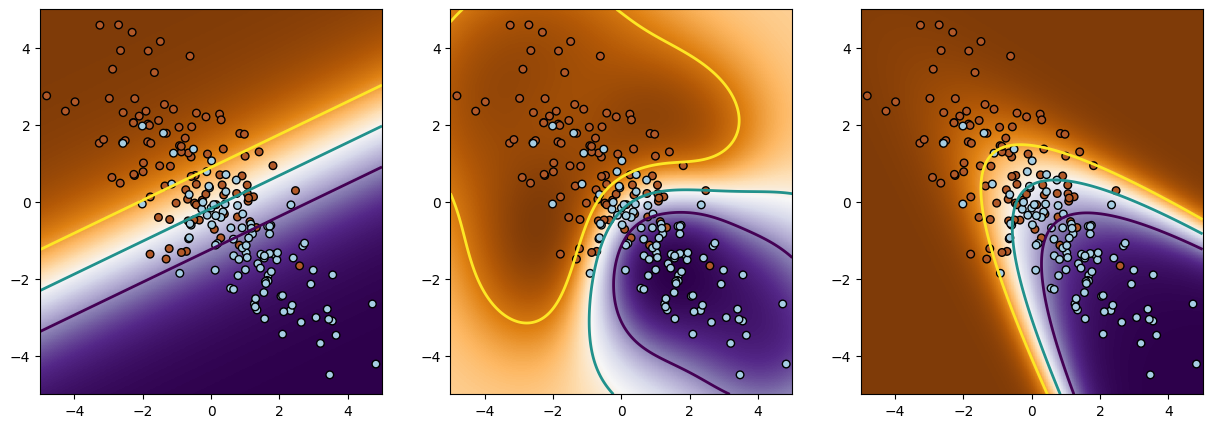

In [ ]:
def make_prob_plots(lr_model,svm_cal_model):
    x1, x2 = np.meshgrid(np.linspace(-5, 5, 500),np.linspace(-5, 5, 500))
    xx = np.c_[x1.ravel(), x2.ravel()]
    opt_pred = pos_likelihood_func(xx)/(pos_likelihood_func(xx)+neg_likelihood_func(xx))
    opt_pred = opt_pred.reshape(x1.shape)

    lr_pred = lr_model.predict_proba(xx)[:,1].reshape(x1.shape)
    svm_cal_pred = svm_cal_model.predict_proba(xx)[:,1].reshape(x1.shape)

    fig, axes = plt.subplots(1,3,figsize=(15,5))
    for i in range(3):
        pred = [lr_pred,svm_cal_pred,opt_pred][i]
        ax = axes[i]
        ax.imshow(pred, interpolation='nearest',
                  extent=(x1.min(), x1.max(), x2.min(), x2.max()), aspect='auto',
                  origin='lower', cmap=plt.cm.PuOr_r)
        contours = ax.contour(x1, x2, pred, levels=[0.25,0.5,0.75], linewidths=2)
        ax.scatter(train_X[:, 0], train_X[:, 1], s=30, c=train_Y, cmap=plt.cm.Paired,
                    edgecolors='k')
        ax.axis([-5, 5, -5, 5])
    plt.show()



try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
#    raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")

    lr_model = sklearn_model # put the logistic regression model here
    svm_cal_model = svm_cal # put the calibrated SVM model here (Platt scaling applied on the SVM model)
    make_prob_plots(lr_model,svm_cal_model)

    ##### YOUR CODE ENDS ##### (please do not delete this line)

except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

**<font color='purple'>Discuss whether better class probability estimates were obtained from logistic regression or from SVM after calibrating with Platt scaling. Explain why:</font>**
SVM is better now after calibrating as the contours are better aligned with the actual data points compared to logisitin regression

 ## <font color='red'>This was the last task! Please restart and run all before submission!</font>